### Sentiment Analysis of State of the Union Addresses

After scraping the presidency project's state of the union transcripts and cleaning for stop words, I use `nltk` and `vaderSentiment` to calculate compound scores for each speech. I find that few speeches are negative in sentiment.

In [1]:
import warnings
warnings.simplefilter('ignore')

import nltk
import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['legend.fontsize'] = 20

In [2]:
speeches = pd.read_pickle('data/sotu_content.pkl')

In [3]:
speeches['date'] = pd.to_datetime(speeches['date'])

In [4]:
speeches = speeches[~speeches.duplicated(subset='date')]

In [5]:
def calc_sentiment_scores(df):
    '''
    Takes a dataframe of speeches and returns vader sentiment scores for each speech
    '''
    analyser = SentimentIntensityAnalyzer()
    compound_score = []
    positive_score = []
    neutral_score = []
    negative_score = []
    
    for speech in df.speech:
        snt_dict = {
            'compound':[],
            'pos':[],
            'neg':[],
            'neu':[]
        }
        for sent in sent_tokenize(speech):
            snt = analyser.polarity_scores(sent)
            snt_dict['compound'].append(snt['compound'])
            snt_dict['pos'].append(snt['pos'])
            snt_dict['neg'].append(snt['neg'])
            snt_dict['neu'].append(snt['neu'])
            
        compound_score.append(np.mean(snt_dict['compound']))
        positive_score.append(np.mean(snt_dict['pos']))
        negative_score.append(np.mean(snt_dict['neg']))
        neutral_score.append(np.mean(snt_dict['neu']))
            
    df['compound'] = pd.Series(compound_score,  index=df.index)
    df['positive'] = pd.Series(positive_score,  index=df.index)
    df['negative'] = pd.Series(negative_score,  index=df.index)
    df['neutral'] = pd.Series(neutral_score,  index=df.index)
    
    return df

In [6]:
# df = calc_sentiment_scores(speeches)
df = pd.read_pickle('data/sotu_sentiment_scores.pkl')

Adding in party identification...

In [7]:
dems = ['Barack Obama', 'Franklin D. Roosevelt', 'Harry S. Truman',
        'Jimmy Carter', 'John F. Kennedy', 'Lyndon B. Johnson', 'William J. Clinton']
df['party'] = df['president'].apply(lambda x: 'D' if x in dems else 'R')

In [8]:
# df.to_pickle('data/sotu_sentiment_scores.pkl')
# df.to_csv('data/sotu_scores.csv', index=False)

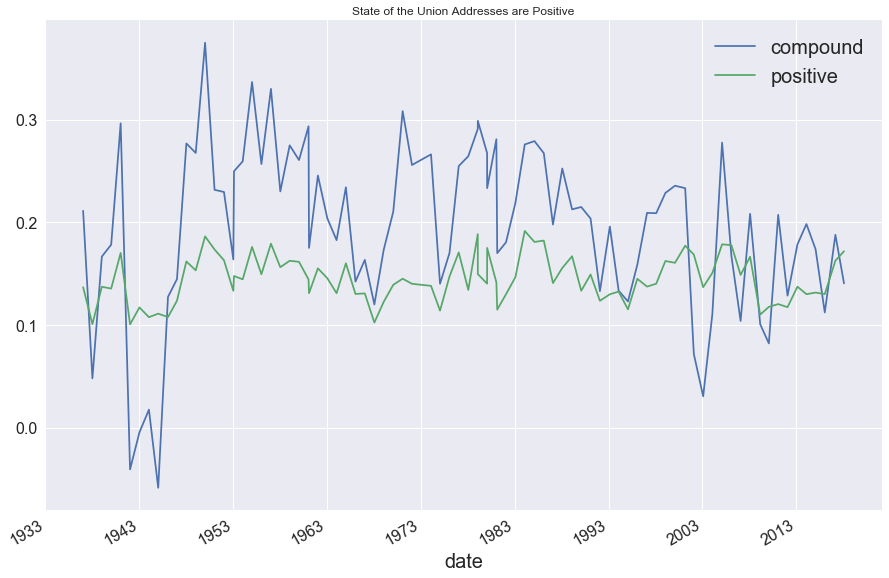

In [9]:
df.plot('date', ['compound', 'positive'])
plt.title('State of the Union Addresses are Positive')
plt.savefig('data/sentiment.png')

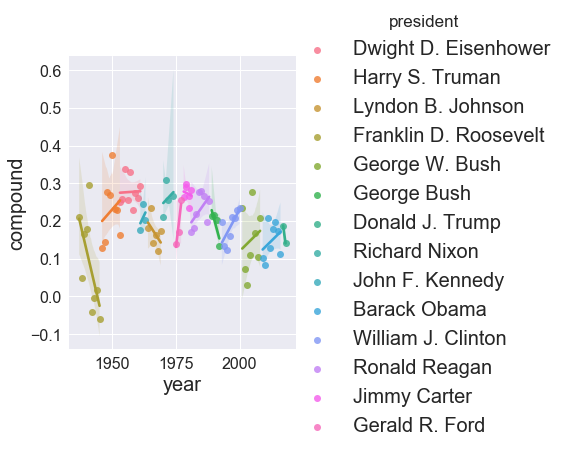

In [10]:
g = sns.lmplot(x='year', y='compound', hue='president', truncate=True, size=8, data=df)
plt.savefig('data/pres_sent.png')

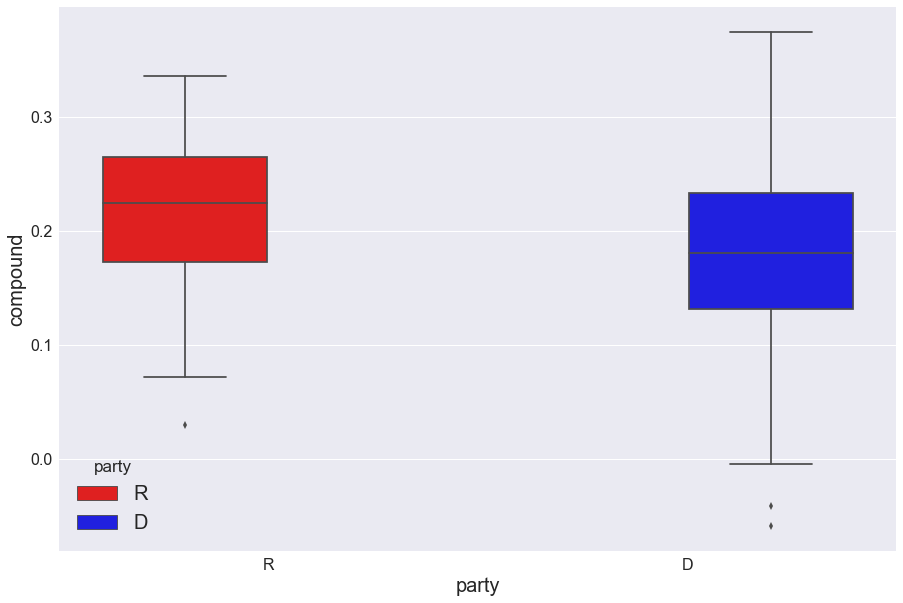

In [11]:
g = sns.boxplot(x='party', y='compound', hue='party', palette={'R': 'r', 'D': 'b'}, data=df)
# plt.savefig('data/box.png')